In [1]:
#Qyestion 2b)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

In [2]:
#Simulate 50 observations from y = 2x + 1 + ε,  ε ~ N(0,1)
np.random.seed(42)
n = 50
x = np.random.uniform(0, 10, n)
eps = np.random.normal(0, 1, n)
y = 2 * x + 1 + eps

In [3]:
#Fit OLS to the clean data
X = sm.add_constant(x)
model_clean = sm.OLS(y, X).fit()
print("Clean data coefficients (Intercept, Slope):")
print(model_clean.params)

Clean data coefficients (Intercept, Slope):
[1.09668927 1.9776566 ]


In [4]:
#Add 5 extreme outliers far from the trend
x_out = np.random.uniform(0, 10, 5)
y_out = 40 + np.random.normal(0, 1, 5)  # large positive outliers
x_all = np.concatenate([x, x_out])
y_all = np.concatenate([y, y_out])


In [5]:
#Fit OLS to the data with outliers
X_all = sm.add_constant(x_all)
model_outliers = sm.OLS(y_all, X_all).fit()
print("\nWith outliers (Intercept, Slope):")
print(model_outliers.params)


With outliers (Intercept, Slope):
[0.96364185 2.4873307 ]


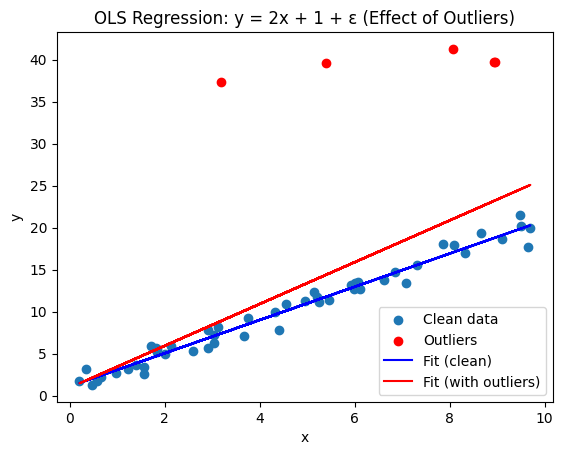

In [6]:
#Plot results
plt.scatter(x, y, label="Clean data")
plt.scatter(x_out, y_out, color="red", label="Outliers")
plt.plot(x, model_clean.predict(X), color="blue", label="Fit (clean)")
plt.plot(x_all, model_outliers.predict(X_all), color="red", label="Fit (with outliers)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("OLS Regression: y = 2x + 1 + ε (Effect of Outliers)")
plt.show()